# WALLABY pilot

Explore the HiPS maps available for the galaxies with kinematic modelling in the WALLABY pilot data

# 1. Initialisation

In [80]:
%matplotlib ipympl
import numpy as np
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
from astropy.table import Table
from astropy import units as u
from scripts import astrobrowser
from photutils.aperture import SkyEllipticalAperture
import importlib

## Read input catalogue

In [51]:
WALLABY_catalogue = Table.read('AS102_Derived_Catalogue_wallaby_pilot_dr1_kinmodel_cat_v01_5844.csv')

In [52]:
WALLABY_catalogue

id,catalogue_id,name,ra,dec,freq,team_release,team_release_kin,vsys_model,e_vsys_model,x_model,e_x_model,y_model,e_y_model,ra_model,e_ra_model,dec_model,e_dec_model,inc_model,e_inc_model,pa_model,e_pa_model,pa_model_g,e_pa_model_g,qflag_model,rad,vrot_model,e_vrot_model,e_vrot_model_inc,rad_sd,sd_model,e_sd_model,sd_fo_model,e_sd_fo_model_inc
int64,int64,str22,float64,float64,float64,str11,str15,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,str315,str246,str191,str187,str315,str247,str229,str278,str276
1,5844,WALLABY J122708+055255,186.786881240741,5.8820870825730704,1415150726.68657,NGC4636 TR1,NGC4636 Kin TR1,1114.5,2.5,21.292,0.3205,27.222,0.0299,186.786343,0.000538,5.882283,4.8e-05,78.1,11.5,194.6,5.8,194.4,5.8,1,"7.5,22.55,37.59,52.64,67.68,82.73,97.78","21.5,46.5,63.6,75.7,81.0,79.6,46.4","4.9,2.4,1.3,3.3,5.6,7.8,35.2","0.9,2.0,2.8,3.3,3.6,3.5,2.0","7.5,22.55,37.59,52.64,67.68,82.73,97.78","24.7,23.86,21.95,18.31,14.18,9.85,6.28","0.73,1.78,3.08,4.26,3.9,4.33,3.98","5.093,4.919,4.527,3.776,2.923,2.032,1.294","4.832,4.667,4.295,3.582,2.773,1.928,1.228"
2,5844,WALLABY J122710+071549,186.795255064477,7.26386914596215,1416017483.10127,NGC4636 TR1,NGC4636 Kin TR1,925.2,1.3,38.123,0.1991,37.349,0.4202,186.795438,0.000338,7.262864,0.000699,37.8,9.8,143.2,0.3,142.9,0.3,0,"7.5,22.55,37.59,52.64,67.68,82.73,97.78,112.82,127.87","83.6,114.1,97.6,95.6,101.1,106.0,109.9,113.0,115.9","26.6,31.7,4.9,1.2,0.7,0.0,0.1,2.1,6.6","19.9,27.2,23.2,22.8,24.1,25.2,26.2,26.9,27.6","7.5,22.55,37.59,52.64,67.68,82.73,97.78,112.82,127.87,142.92,157.96,173.01","6.47,5.64,5.36,6.18,6.54,5.95,4.94,3.6,1.99,1.19,0.71,0.18","0.59,0.7,0.61,0.74,0.7,0.53,0.47,0.42,0.32,0.25,0.19,0.09","5.107,4.452,4.232,4.878,5.163,4.7,3.898,2.845,1.573,0.938,0.561,0.142","0.676,0.59,0.56,0.646,0.684,0.622,0.516,0.377,0.208,0.124,0.074,0.019"
3,5844,WALLABY J122726+061551,186.85974596815,6.26417982396419,1413579138.03846,NGC4636 TR1,NGC4636 Kin TR1,1447.2,1.4,24.57,0.2005,21.516,0.4501,186.859777,0.00034,6.263072,0.000749,41.2,3.3,80.5,1.9,80.3,1.9,0,"22.5,37.55,52.59,67.64,82.68","80.1,90.7,97.2,96.0,78.8","2.5,1.7,2.3,0.8,16.4","5.4,6.1,6.5,6.4,5.3","22.5,37.55,52.59,67.64,82.68","4.32,5.26,4.46,2.7,1.09","1.05,0.99,0.67,0.52,0.42","3.251,3.957,3.361,2.034,0.823","0.165,0.201,0.171,0.103,0.042"
4,5844,WALLABY J122733+061359,186.888002798772,6.23326818577916,1390698517.03096,NGC4636 TR1,NGC4636 Kin TR1,6402.0,1.1,24.833,0.0635,25.366,0.5258,186.887977,0.00011,6.234586,0.000876,31.0,4.8,30.0,3.3,29.7,3.3,0,"7.5,22.55,37.59,52.64,67.68","99.3,123.2,139.6,144.5,139.3","6.1,4.4,5.3,4.4,0.8","14.1,17.5,19.9,20.6,19.8","7.5,22.55,37.59,52.64,67.68,82.73,97.78","5.64,4.31,3.29,2.15,0.84,0.3,0.04","0.59,0.78,0.73,0.52,0.43,0.22,0.05","4.831,3.697,2.817,1.842,0.717,0.253,0.031","0.242,0.186,0.141,0.092,0.036,0.013,0.002"
5,5844,WALLABY J122852+041739,187.218610111251,4.29419801746214,1400578965.20651,NGC4636 TR1,NGC4636 Kin TR1,4232.4,1.3,26.849,0.4946,28.498,0.3251,187.219163,0.000828,4.294116,0.000539,82.8,4.1,54.4,0.3,54.2,0.3,1,"7.5,22.55,37.59,52.64,67.68,82.73,97.78,112.82,127.87","109.1,145.6,138.3,135.4,141.7,144.0,144.1,142.5,138.2","59.9,69.5,3.3,2.5,2.6,0.6,2.4,1.7,3.8","1.0,1.3,1.3,1.2,1.3,1.3,1.3,1.3,1.3","7.5,22.55,37.59,52.64,67.68,82.73,97.78,112.82,127.87","18.83,18.9,16.62,14.85,12.78,10.09,7.32,5.54,4.21","1.25,3.02,3.16,3.56,4.2,4.54,3.58,3.54,3.43","2.375,2.383,2.096,1.873,1.611,1.273,0.923,0.698,0.53","1.337,1.341,1.18,1.054,0.907,0.716,0.519,0.393,0.298"
6,5844,WALLABY J122932+005020,187.38498504791,0.839137790751842,1409896951.722,NGC4636 TR1,NGC4636 Kin TR1,2236.3,0.5,18.083,0.0752,14.788,0.2045,187.385819,0.000126,0.839689,0.000341,81.6,8.3,72.5,0.6,72.5,0.6,1,"7.5,22.56,37.63,52.69,67.75","27.9,46.4,57.7,62.3,62.5","4.3,3.6,1.3,0.6,3.7","0.6,1.0,1.2,1.3,1.3","7.5,22.56,37.63,52.69,67.75","8.44,8.02,6.7,4.82,2.6","0.12,0.49,1.49,2.1,2.36","1.228,1.167,0.974,0.7,0.378",

In [26]:
radius = []
for radii in WALLABY_catalogue['rad']:
    last_radius = float(radii.split(',')[-1])
    radius.append(2*last_radius)

In [27]:
catalogue = Table([WALLABY_catalogue['name'],
                   WALLABY_catalogue['ra_model'],
                   WALLABY_catalogue['dec_model'],
                   radius,
                   np.ones(len(radius))
                  ], names=['ID', 'RA', 'DEC', 'RADIUS_ARCSEC', 'PIXEL_SIZE_ARCSEC'])

In [28]:
catalogue

ID,RA,DEC,RADIUS_ARCSEC,PIXEL_SIZE_ARCSEC
str22,float64,float64,float64,float64
WALLABY J122708+055255,186.786343,5.882283,195.56,1.0
WALLABY J122710+071549,186.795438,7.262864,255.74,1.0
WALLABY J122726+061551,186.859777,6.263072,165.36,1.0
WALLABY J122733+061359,186.887977,6.234586,135.36,1.0
WALLABY J122852+041739,187.219163,4.294116,255.74,1.0
WALLABY J122932+005020,187.385819,0.839689,135.5,1.0
...,...,...,...,...
WALLABY J104000-292445,160.000977,-29.412882,135.4,1.0
WALLABY J104004-301606,160.016392,-30.265695,135.4,1.0


# 2. Explore available skymaps

Select the maps for this galaxy:

interactive(children=(BoundedIntText(value=0, description='galaxy_index', max=124), Combobox(value='CDS/P/PanS…

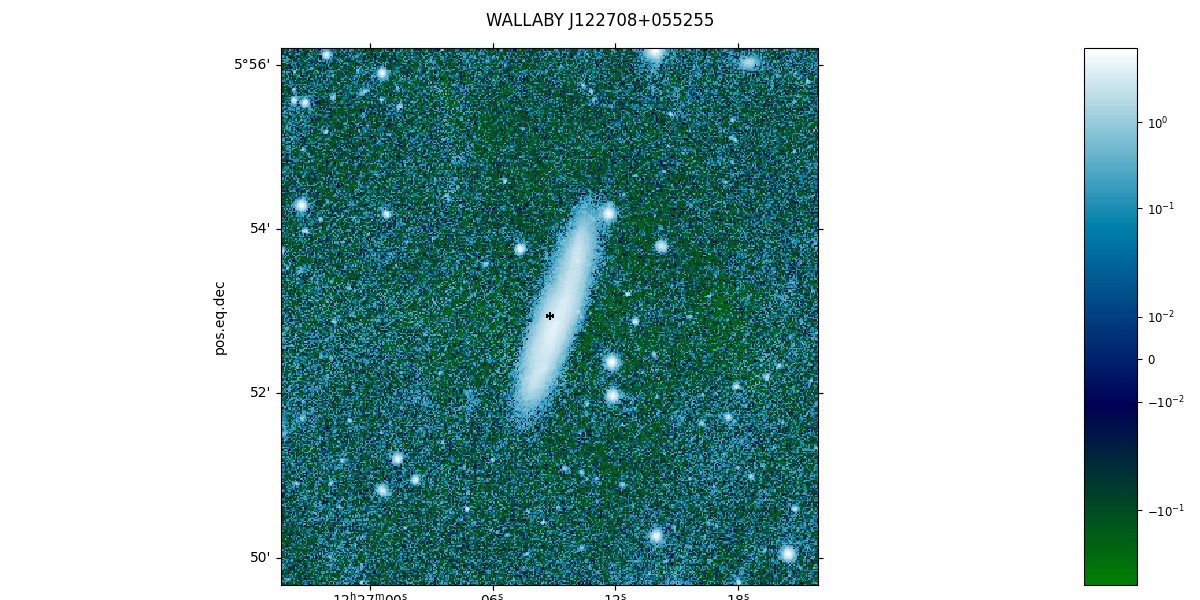

In [152]:
importlib.reload(astrobrowser)
x = astrobrowser.DataExplorer(catalogue, 'CDS/P/PanSTARRS/DR1/r')

In [161]:
galaxy = WALLABY_catalogue[x.galaxy_index]
position = SkyCoord(galaxy['ra_model'], galaxy['dec_model'], unit='deg', frame='icrs')
cos_i = np.cos(galaxy['inc_model'] * u.deg)
theta = -galaxy['pa_model'] * u.deg
#print(galaxy['inc_model'], cos_i, theta)
for radius in galaxy['rad'].split(','):
    r = float(radius) * u.arcsec
    aperture = SkyEllipticalAperture(position, a=r, b=r*cos_i, theta=theta)
    pixel_aperture = aperture.to_pixel(x.wcs)
    pixel_aperture.positions = [np.array(x.data.shape) / 2]  # dirty fix
    pixel_aperture.plot(x.ax1)

In [147]:
pixel_aperture.position

AttributeError: 'EllipticalAperture' object has no attribute 'position'

In [132]:
ra, dec = np.array(x.data.shape) / 2
print(ra, dec, x.wcs.pixel_to_world(ra, dec), x.wcs.world_to_pixel(position))

135.5 135.5 <SkyCoord (ICRS): (ra, dec) in deg
    (186.85065643, 6.23476378)> (array(269.05942537), array(134.86479479))


In [137]:
aperture, galaxy['ra_model'], galaxy['dec_model'], galaxy['dec']

(<SkyEllipticalAperture(<SkyCoord (ICRS): (ra, dec) in deg
     (187.385819, 0.839689)>, a=67.75 arcsec, b=9.89712518510339 arcsec, theta=-72.5 deg)>,
 187.385819,
 0.839689,
 0.839137790751842)

In [159]:
WALLABY_catalogue[25]

id,catalogue_id,name,ra,dec,freq,team_release,team_release_kin,vsys_model,e_vsys_model,x_model,e_x_model,y_model,e_y_model,ra_model,e_ra_model,dec_model,e_dec_model,inc_model,e_inc_model,pa_model,e_pa_model,pa_model_g,e_pa_model_g,qflag_model,rad,vrot_model,e_vrot_model,e_vrot_model_inc,rad_sd,sd_model,e_sd_model,sd_fo_model,e_sd_fo_model_inc
int64,int64,str22,float64,float64,float64,str11,str15,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,str315,str246,str191,str187,str315,str247,str229,str278,str276
26,5844,WALLABY J123954-004804,189.978347100127,-0.8012681790448131,1399614829.56582,NGC4636 TR1,NGC4636 Kin TR1,4443.3,0.1,18.749,0.3486,23.123,0.0036,189.978588,0.000581,-0.799811,6e-06,37.1,1.1,165.5,0.2,165.4,0.2,0,"7.5,22.56,37.63","50.8,86.8,85.3","6.7,4.4,0.8","1.2,2.1,2.1","7.5,22.56,37.63,52.69,67.75","4.95,3.99,2.33,0.76,0.18","0.22,0.44,0.43,0.24,0.11","3.949,3.181,1.861,0.609,0.146","0.055,0.044,0.026,0.008,0.002"
